In [8]:
""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

def give_data(funct_to_get):
    # early_data = funct_to_get()
    early_data = funct_to_get(late_hours = True) # to be changed
    late_data = funct_to_get(late_hours = True)
    return [early_data, late_data]

bus_stops_dfs = give_data(give_modified_bus_stops_df)
lines_stops_dfs = give_data(give_modified_lines_stops_df)
positions_dfs = give_data(give_modified_curr_positions_df)
time_tables_dfs = give_data(give_modified_time_tables_df)

print(bus_stops_dfs)
print(lines_stops_dfs)
print(positions_dfs)
print(time_tables_dfs)

True
True
[                     place  street_id        lat        lon  \
0                 Kijowska     2201.0  52.248455  21.044827   
1                 Kijowska     2201.0  52.249078  21.044443   
2                 Kijowska     2201.0  52.248928  21.044169   
3                 Kijowska     2201.0  52.249969  21.041588   
4                 Kijowska     1203.0  52.250319  21.043861   
...                    ...        ...        ...        ...   
8171  Warszawa Śródmieście     3036.0  52.229230  21.006450   
8172      Warszawa Powiśle     3036.0  52.233900  21.028760   
8173      Warszawa Powiśle     3036.0  52.233570  21.027500   
8174      Warszawa Gdańska     3036.0  52.259009  20.994033   
8175      Warszawa Gdańska     3036.0  52.259198  20.989514   

                 direction bus_stop_id  
0           al.Zieleniecka     1002002  
1                Ząbkowska     1002003  
2           al.Zieleniecka     1002004  
3                Ząbkowska     1002005  
4           al.Zieleniecka 

c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:67: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value])
c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:67: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value])


In [9]:
from Speed.speed import give_data_with_allowed_and_not_allowed_speed
from Helpers.visualization import plot_points_on_map

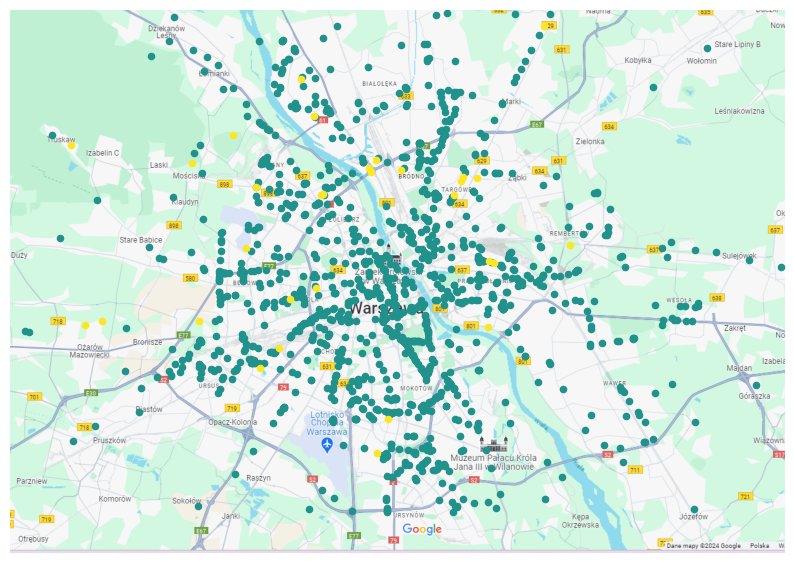

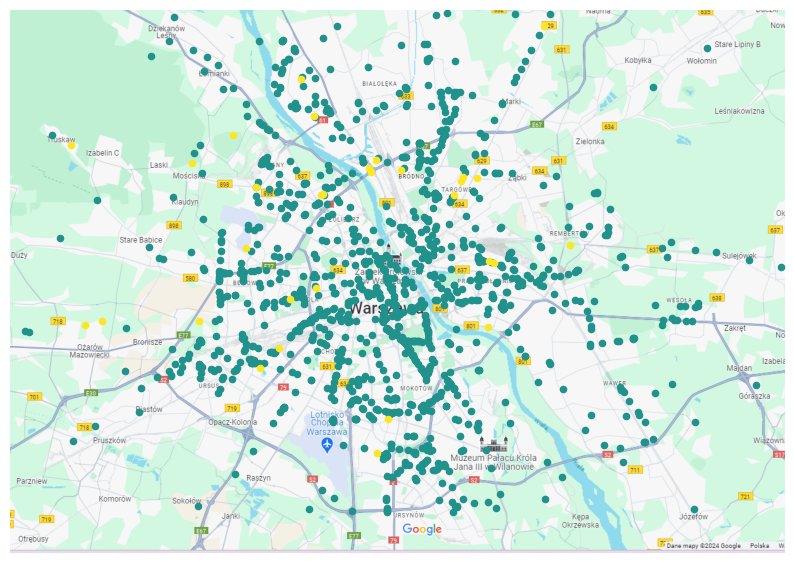

In [10]:
""" 
Here we are plotting on map two kinds of measurements:
1. buses which have speed over 50 km / h
2. the rest
(we are not considering buses over 90 km / h)
"""

speed_data_early = give_data_with_allowed_and_not_allowed_speed(positions_dfs[0])
speed_data_late = give_data_with_allowed_and_not_allowed_speed(positions_dfs[1])

plot_points_on_map(speed_data_early)
plot_points_on_map(speed_data_late)

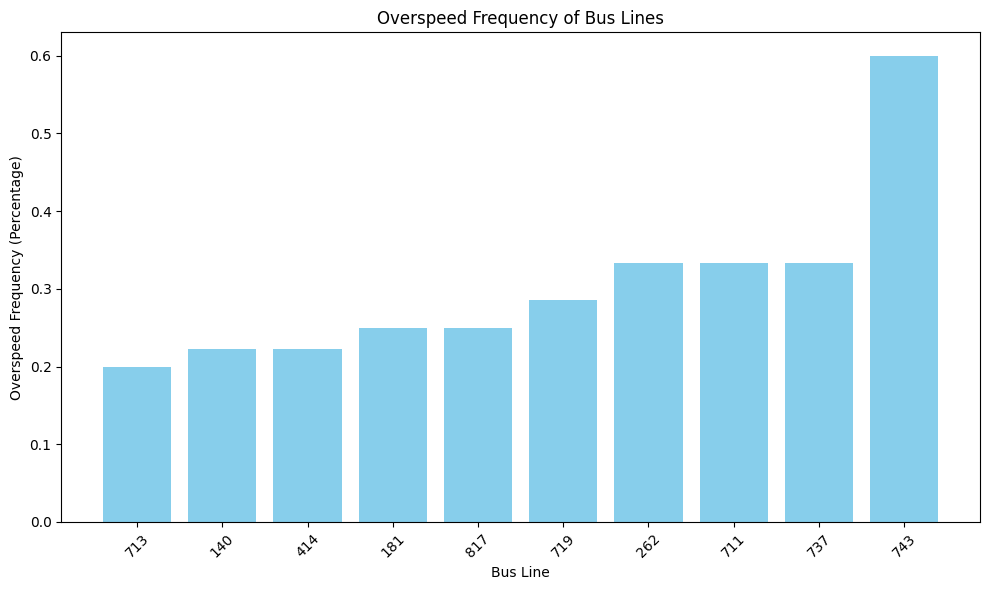

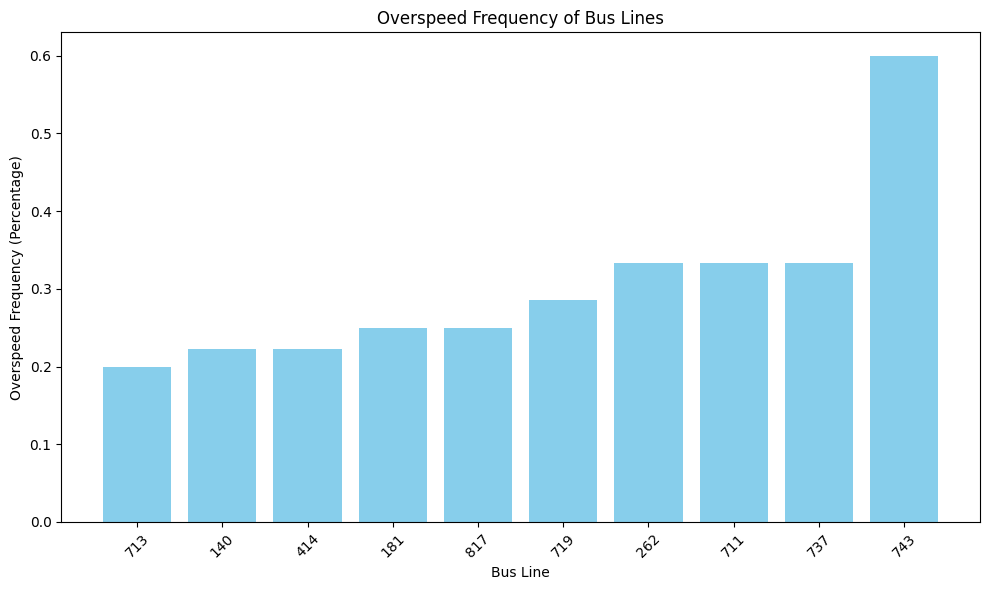

In [11]:
""" 
Now we can check for 10 fastest lines and plot them
(just for fun)
"""
from Speed.speed import give_lines_with_most_frequent_overspeed
from Helpers.visualization import visualize_overspeed_percentage_within_line

HOW_MANY_FAST_LINES  = 10
fast_lines_early = give_lines_with_most_frequent_overspeed(positions_dfs[0], 
                                                                how_many = HOW_MANY_FAST_LINES)
fast_lines_late = give_lines_with_most_frequent_overspeed(positions_dfs[1], 
                                                                how_many = HOW_MANY_FAST_LINES)
    
visualize_overspeed_percentage_within_line(fast_lines_early)
visualize_overspeed_percentage_within_line(fast_lines_late)
    


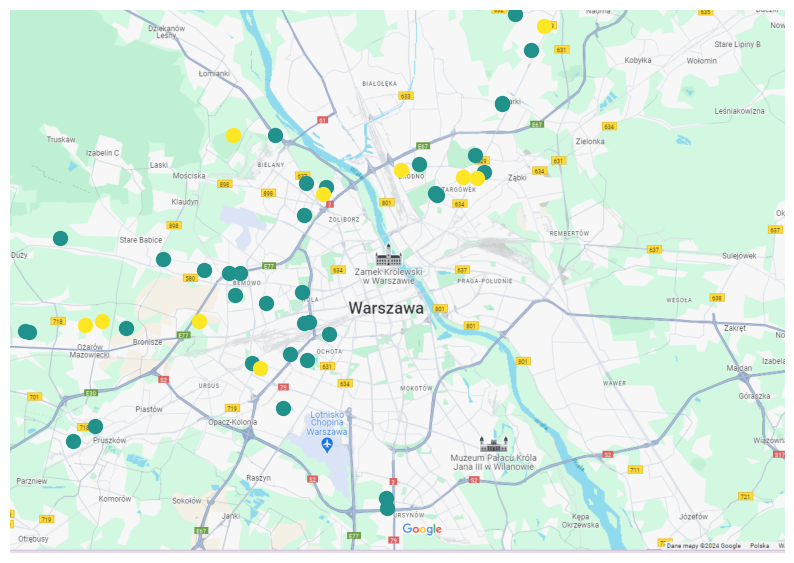

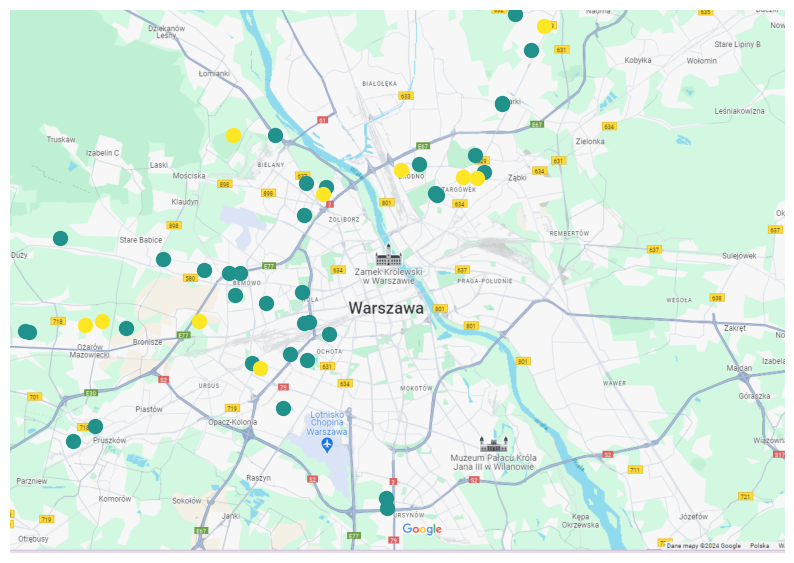

In [12]:
from Data_reading.modifying_dfs import Aliases as als

def plot_fast_lines(fast_lines, positions_df):
    num_of_fast_lines = [x[0] for x in fast_lines]
    pos_of_fast_lines = positions_df[positions_df[als.LINE.value].isin(num_of_fast_lines)] 

    speed_data = give_data_with_allowed_and_not_allowed_speed(pos_of_fast_lines)
    plot_points_on_map(speed_data, dot_size = 100)
    
plot_fast_lines(fast_lines_early, positions_dfs[0])
plot_fast_lines(fast_lines_late, positions_dfs[1])

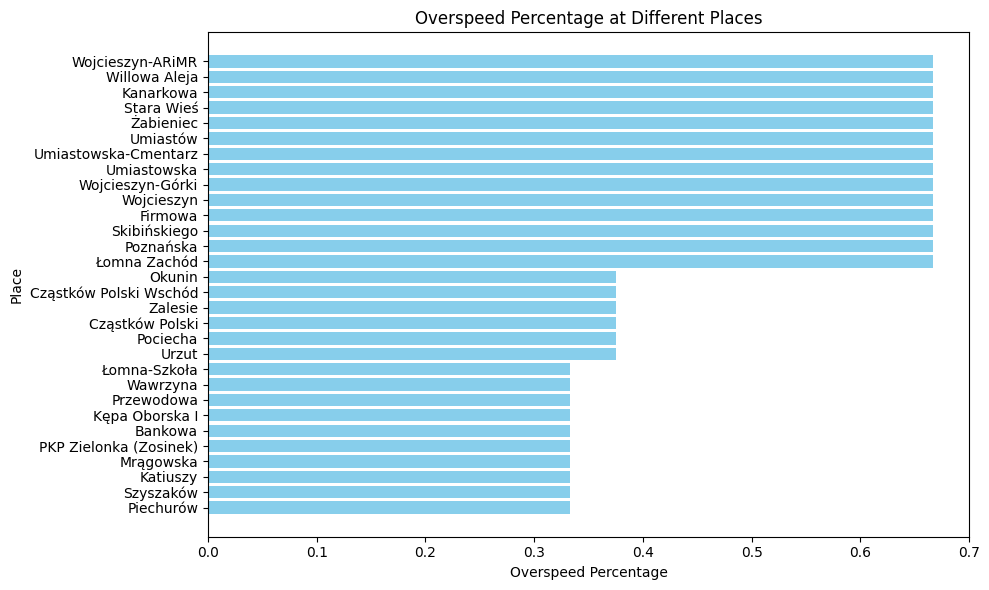

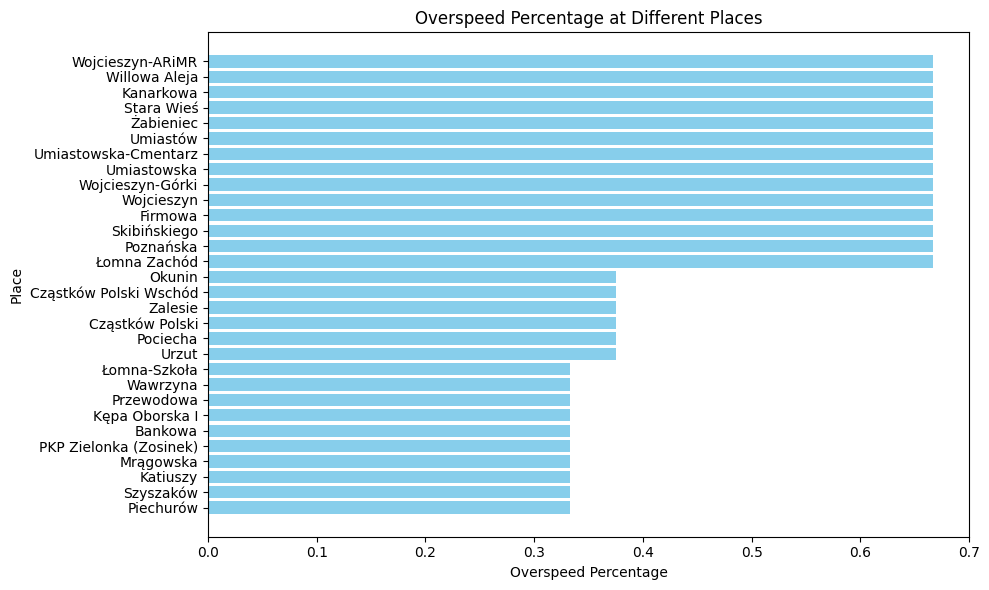

In [13]:
""" 
Now we are going to plot places around which 
overspeed was very frequent
"""

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places
from Helpers.visualization import visualize_overspeed_in_places

HOW_MANY = 30

speed_with_coords_early = give_dataframe_of_coords_with_line_and_speed(positions_dfs[0])
speed_with_coords_late = give_dataframe_of_coords_with_line_and_speed(positions_dfs[1])

fastest_places_early = give_fastest_places(bus_stops_dfs[0], speed_with_coords_early, how_many = HOW_MANY)
fastest_places_late = give_fastest_places(bus_stops_dfs[1], speed_with_coords_late, how_many = HOW_MANY)

visualize_overspeed_in_places(fastest_places_early)
visualize_overspeed_in_places(fastest_places_late)


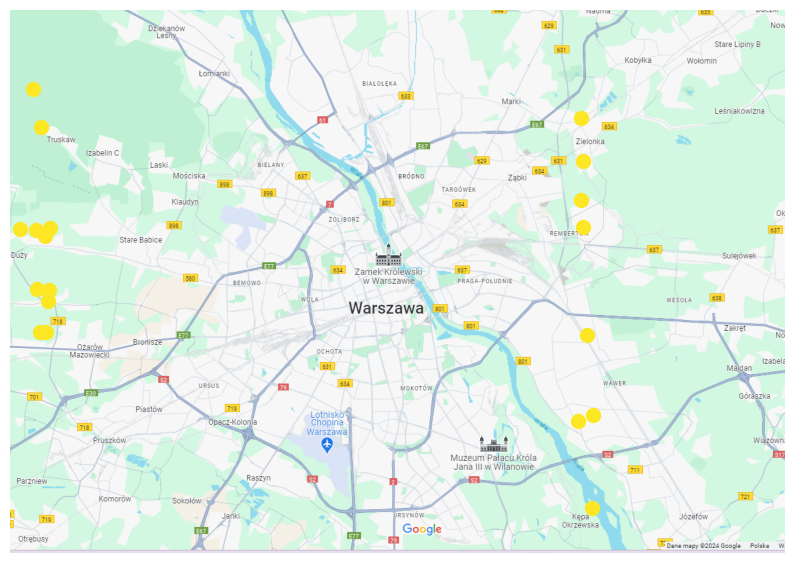

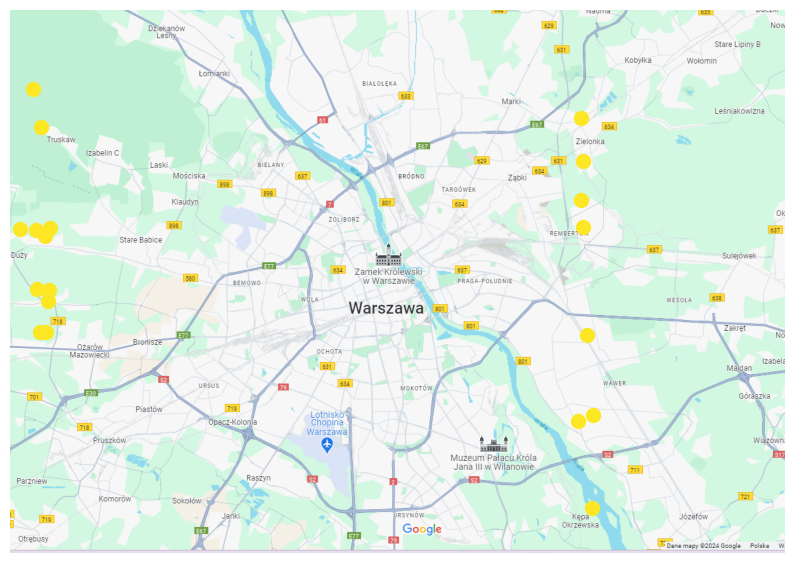

In [14]:
from Speed.fast_localizations import give_places_coords_to_plot_on_map

fastest_places_coords_data_early = give_places_coords_to_plot_on_map(fastest_places_early,
                                                                     bus_stops_dfs[0])
fastest_places_coords_data_late = give_places_coords_to_plot_on_map(fastest_places_late,
                                                                     bus_stops_dfs[1])

plot_points_on_map(fastest_places_coords_data_early, dot_size=100)
plot_points_on_map(fastest_places_coords_data_late, dot_size = 100)

In [15]:
from Punctuality.arrivals import give_df_with_arrivals

arrivals_df_early = give_df_with_arrivals(positions_dfs[0], lines_stops_dfs[0], bus_stops_dfs[0])
arrivals_df_late = give_df_with_arrivals(positions_dfs[1], lines_stops_dfs[1], bus_stops_dfs[1])


In [16]:
from Punctuality.punctuality import give_df_with_avg_delay_on_bus_stop 
from Punctuality.punctuality import give_df_with_expected_waiting_time_on_bus_stop 

expected_waiting_early = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_early, 
                                                                       positions_dfs[0])
expected_waiting_late = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_late, 
                                                           positions_dfs[1])

delays_early = give_df_with_avg_delay_on_bus_stop(arrivals_df_early, time_tables_dfs[0])
delays_late = give_df_with_avg_delay_on_bus_stop(arrivals_df_early, time_tables_dfs[1])

from Punctuality.prep_to_visualize import most_delayed_bus_stops_data
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time


[Timestamp('2024-01-30 15:50:56')]
[Timestamp('2024-01-30 15:50:56')]


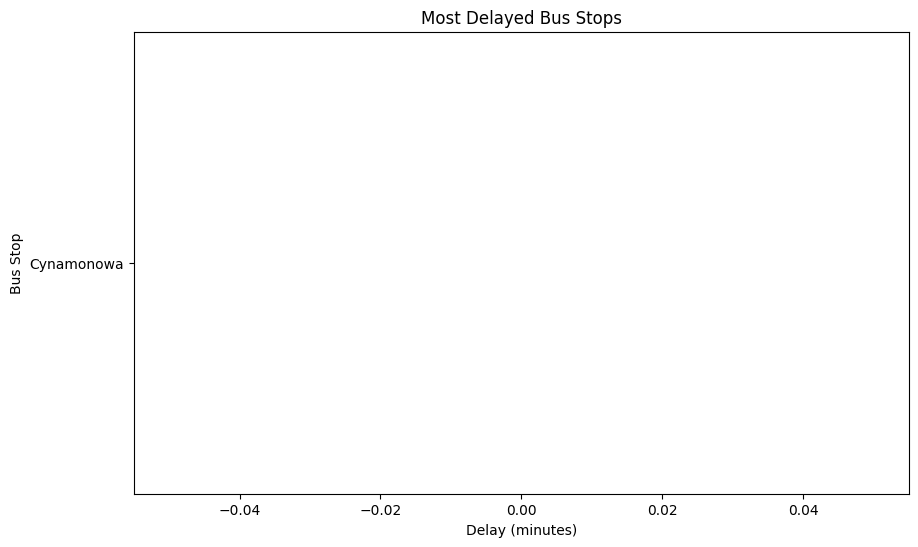

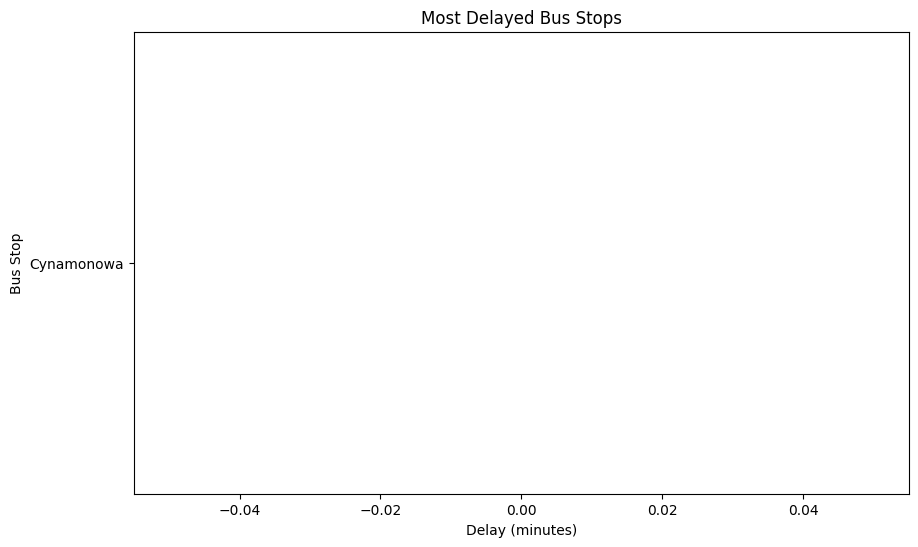

In [17]:
from Punctuality.prep_to_visualize import most_delayed_bus_stops_data

from Helpers.visualization import plot_most_delayed_bus_stops

HOW_MANY = 15

def plot_delays(delays_df, how_many = 20):
    df = most_delayed_bus_stops_data(delays_df, bus_stops_dfs[0], how_many)
    plot_most_delayed_bus_stops(df)
    
plot_delays(delays_early, HOW_MANY)
plot_delays(delays_late, HOW_MANY)


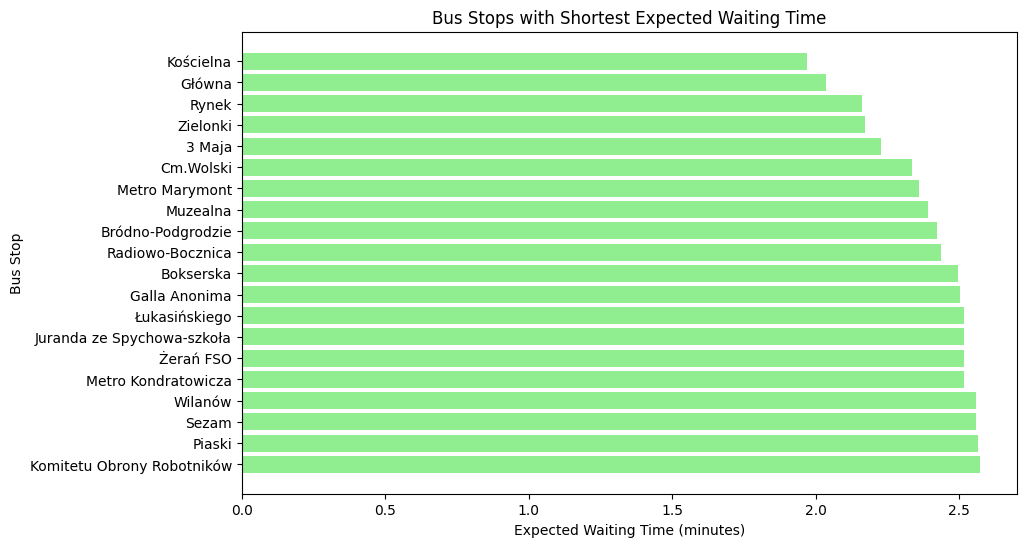

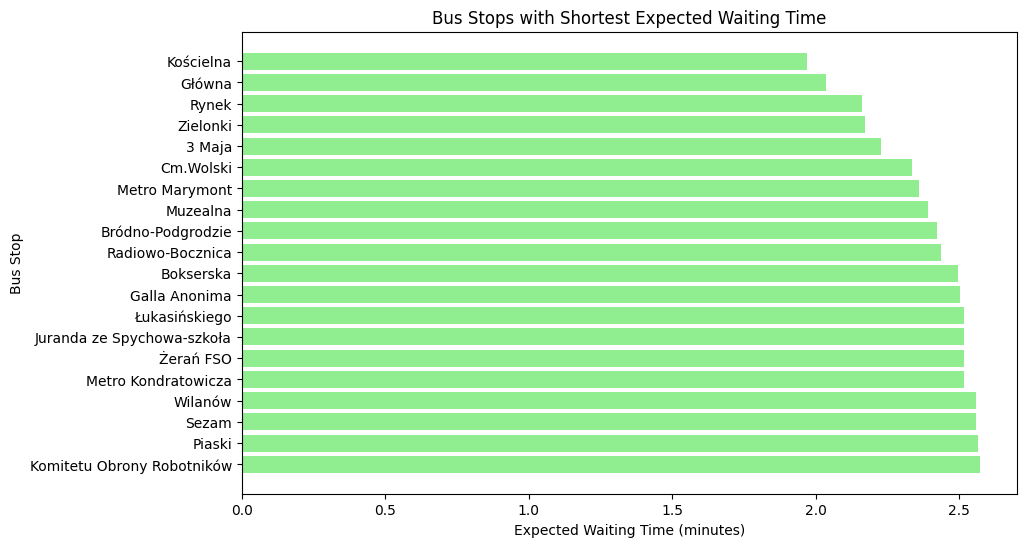

In [18]:
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops

from Helpers.visualization import plot_shortest_expected_waiting_bus_stops

def plot_expected_waiting_time(expected_time_df, how_many = 20):
    df = shortest_expected_waiting_bus_stops(expected_time_df, bus_stops_dfs[0], how_many)
    plot_shortest_expected_waiting_bus_stops(df)
    
plot_expected_waiting_time(expected_waiting_early)
plot_expected_waiting_time(expected_waiting_late)

[[52.149143, 21.055655, 1]]


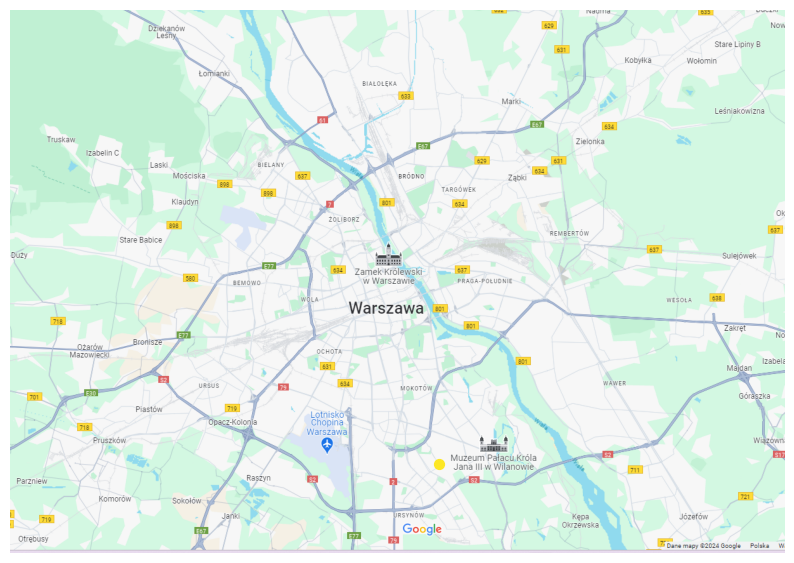

[[52.149143, 21.055655, 1]]


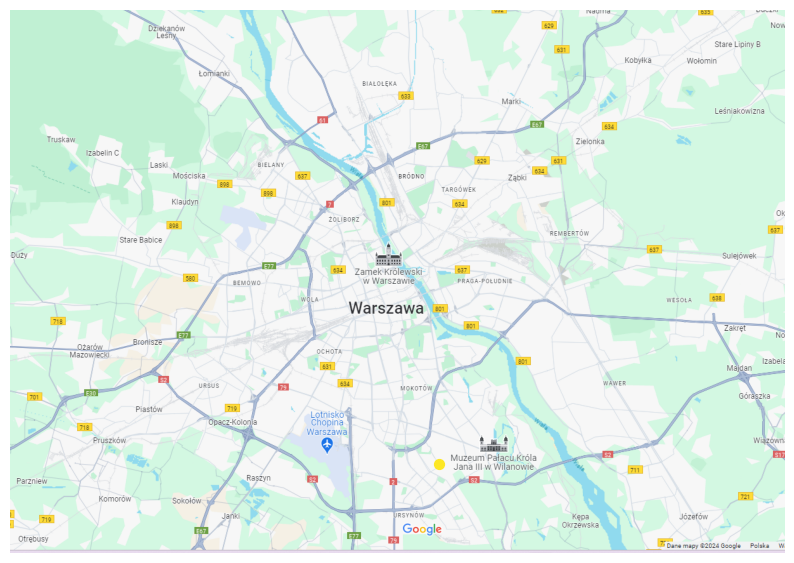

In [24]:
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time

PLANNING_DELAY = 7
DOT_SIZE = 50

def plot_bus_stops_where_better_random_time(delays_df, expected_waiting_df):
    data_to_plot = bus_stops_to_plot_on_map_where_better_random_time(delays_df,
                                                                     expected_waiting_df,
                                                                     bus_stops_dfs[0],
                                                                     PLANNING_DELAY)
    print(data_to_plot)
    plot_points_on_map(data_to_plot, dot_size = DOT_SIZE)
    
plot_bus_stops_where_better_random_time(delays_early, expected_waiting_early)
plot_bus_stops_where_better_random_time(delays_late, expected_waiting_late)